In [2]:
import pandas as pd
import statsmodels.api as sm

# Sample Data
data = {'YearsExperience': [5, 8, 3, 10, 6, 2, 12, 4, 7, 9],
        'EducationBackground': ['High School', 'Bachelor', 'High School', 'Master', 'Bachelor',
                                'High School', 'Master', 'High School', 'Bachelor', 'Master'],
        'EducationalAttainment': ['High School', 'Master', 'High School', 'Master', 'Bachelor',
                                  'High School', 'Master', 'High School', 'Bachelor', 'Master']}

df = pd.DataFrame(data)

# Create design matrix with dummy variables for categorical variable
X = pd.get_dummies(df[['YearsExperience', 'EducationBackground']], drop_first=True)

# Add constant for intercept
X = sm.add_constant(X)

# Fit multinomial logistic regression model
model = sm.MNLogit(df['EducationalAttainment'], X)
result = model.fit()

# Display results
print(result.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [3]:
import numpy as np
from scipy.stats import bernoulli, multivariate_normal

# Set seed for reproducibility
np.random.seed(42)

# Parameters
num_samples = 2000
num_features = 100
num_relevant_features = 50
num_pos_corr = 25
num_neg_corr = 25

# Generate random data
X = np.random.randn(num_samples, num_features)

# Create relevant features
relevant_features = np.random.choice(num_features, num_relevant_features, replace=False)
positive_corr_features = relevant_features[:num_pos_corr]
negative_corr_features = relevant_features[num_pos_corr:]

# Set weights for relevant features
weights = np.zeros(num_features)
weights[positive_corr_features] = 1  # Positive correlation with target
weights[negative_corr_features] = -1  # Negative correlation with target

# Simulate target variable
linear_predictor = np.dot(X, weights)
probabilities = 1 / (1 + np.exp(-linear_predictor))
target = bernoulli.rvs(probabilities)

# Display some information
print(f"Number of relevant features: {num_relevant_features}")
print(f"Positive correlated features: {positive_corr_features}")
print(f"Negative correlated features: {negative_corr_features}")

# Print the first few rows of the generated data
print("Simulated Data:")
print(X[:5, :])
print("Target:")
print(target[:5])


Number of relevant features: 50
Positive correlated features: [78 77 12 65 90 13 92 87 33 72 73 52 76 43 20 18  3 53 69 99 29 66  1 49
 55]
Negative correlated features: [45 41 15 70 37 93 21  2 85 14 19 58 60 75 64 16 46 26 24 82 54 11 98 30
 83]
Simulated Data:
[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
   0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
  -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
  -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
  -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
   0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
  -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
   0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
   1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554

c:\Users\esual\OneDrive\Documents\StaDS\lmu_repo\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\esual\OneDrive\Documents\StaDS\lmu_repo\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


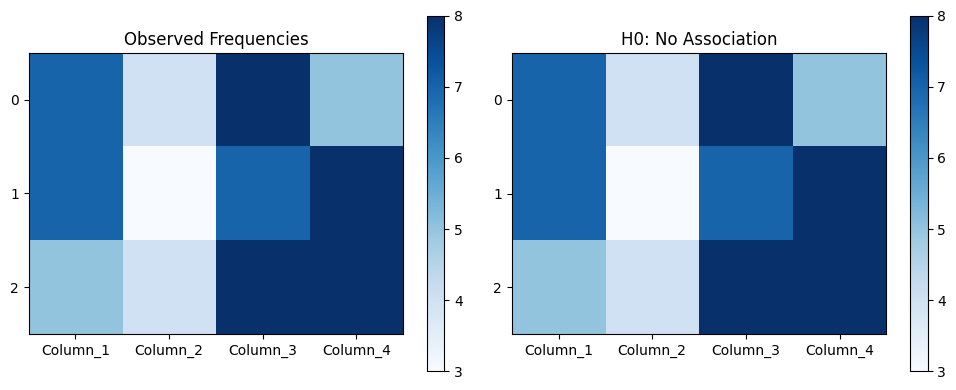

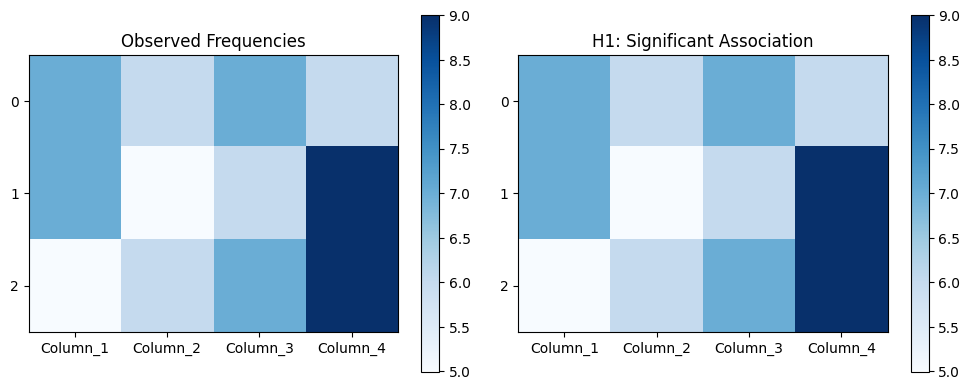

Chi-square statistic (H0): Column_1    0.480175
Column_2    0.212121
Column_3    0.122319
Column_4    0.712540
dtype: float64
Degrees of Freedom (H0): 6

Chi-square statistic (H1): Column_1    0.475184
Column_2    0.147645
Column_3    0.131054
Column_4    0.615385
dtype: float64
Degrees of Freedom (H1): 6


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to generate random data for two categorical variables
def generate_data(rows, columns):
    data = np.random.randint(1, 10, size=(rows, columns))
    return pd.DataFrame(data, columns=[f'Column_{i}' for i in range(1, columns + 1)])

# Function to perform chi-square test calculations from scratch
def chi_square_test(observed):
    # Calculate expected frequencies
    row_totals = observed.sum(axis=1)
    col_totals = observed.sum(axis=0)
    total_observed = row_totals.sum()

    expected = np.outer(row_totals, col_totals) / total_observed

    # Calculate chi-square statistic
    chi_square_statistic = np.sum((observed - expected)**2 / expected)

    # Calculate degrees of freedom
    df = (observed.shape[0] - 1) * (observed.shape[1] - 1)

    return chi_square_statistic, df

# Function to visualize the data and hypothesis graphs
def visualize(data, observed, expected, title):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(observed, cmap='Blues', interpolation='nearest')
    plt.title("Observed Frequencies")
    plt.xticks(range(data.shape[1]), data.columns)
    plt.yticks(range(data.shape[0]), data.index)
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.imshow(expected, cmap='Blues', interpolation='nearest')
    plt.title(title)
    plt.xticks(range(data.shape[1]), data.columns)
    plt.yticks(range(data.shape[0]), data.index)
    plt.colorbar()

    plt.tight_layout()
    plt.show()

# Generate random data for two categorical variables
np.random.seed(42)
data = generate_data(rows=3, columns=4)

# Assume H0: No association (random data)
observed_H0 = data.copy()

# Assume H1: Significant association (slightly skewed data)
observed_H1 = data.apply(lambda x: x + np.random.randint(-2, 3), axis=0)

# Perform chi-square test calculations
chi_square_statistic_H0, df_H0 = chi_square_test(observed_H0)
chi_square_statistic_H1, df_H1 = chi_square_test(observed_H1)

# Visualize the data and hypothesis graphs
visualize(data, observed_H0, observed_H0, "H0: No Association")
visualize(data, observed_H1, observed_H1, "H1: Significant Association")

# Print chi-square statistics and degrees of freedom
print("Chi-square statistic (H0):", chi_square_statistic_H0)
print("Degrees of Freedom (H0):", df_H0)
print("\nChi-square statistic (H1):", chi_square_statistic_H1)
print("Degrees of Freedom (H1):", df_H1)


c:\Users\esual\OneDrive\Documents\StaDS\lmu_repo\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\esual\OneDrive\Documents\StaDS\lmu_repo\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


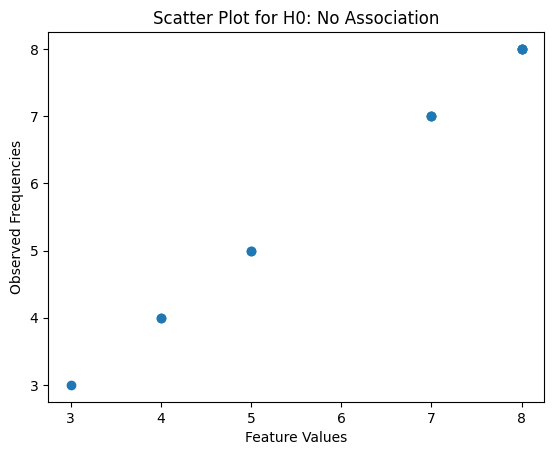

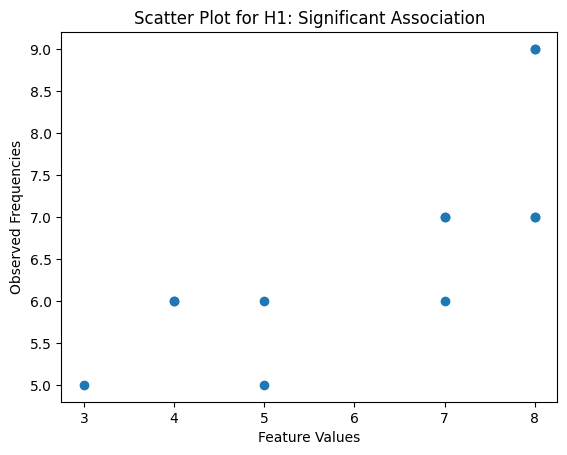

Chi-square statistic (H0): Column_1    0.480175
Column_2    0.212121
Column_3    0.122319
Column_4    0.712540
dtype: float64
Degrees of Freedom (H0): 6

Chi-square statistic (H1): Column_1    0.475184
Column_2    0.147645
Column_3    0.131054
Column_4    0.615385
dtype: float64
Degrees of Freedom (H1): 6


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to generate random data for two categorical variables
def generate_data(rows, columns):
    data = np.random.randint(1, 10, size=(rows, columns))
    return pd.DataFrame(data, columns=[f'Column_{i}' for i in range(1, columns + 1)])

# Function to perform chi-square test calculations from scratch
def chi_square_test(observed):
    # Calculate expected frequencies
    row_totals = observed.sum(axis=1)
    col_totals = observed.sum(axis=0)
    total_observed = row_totals.sum()

    expected = np.outer(row_totals, col_totals) / total_observed

    # Calculate chi-square statistic
    chi_square_statistic = np.sum((observed - expected)**2 / expected)

    # Calculate degrees of freedom
    df = (observed.shape[0] - 1) * (observed.shape[1] - 1)

    return chi_square_statistic, df

# Generate random data for two categorical variables
np.random.seed(42)
data = generate_data(rows=3, columns=4)

# Assume H0: No association (random data)
observed_H0 = data.copy()

# Assume H1: Significant association (slightly skewed data)
observed_H1 = data.apply(lambda x: x + np.random.randint(-2, 3), axis=0)

# Perform chi-square test calculations
chi_square_statistic_H0, df_H0 = chi_square_test(observed_H0)
chi_square_statistic_H1, df_H1 = chi_square_test(observed_H1)

# Visualize the scatter plot for H0
plt.scatter(data.values.flatten(), observed_H0.values.flatten())
plt.title("Scatter Plot for H0: No Association")
plt.xlabel("Feature Values")
plt.ylabel("Observed Frequencies")
plt.show()

# Visualize the scatter plot for H1
plt.scatter(data.values.flatten(), observed_H1.values.flatten())
plt.title("Scatter Plot for H1: Significant Association")
plt.xlabel("Feature Values")
plt.ylabel("Observed Frequencies")
plt.show()

# Print chi-square statistics and degrees of freedom
print("Chi-square statistic (H0):", chi_square_statistic_H0)
print("Degrees of Freedom (H0):", df_H0)
print("\nChi-square statistic (H1):", chi_square_statistic_H1)
print("Degrees of Freedom (H1):", df_H1)


In [7]:
observed_H0

,Column_1,Column_2,Column_3,Column_4
0,7,4,8,5
1,7,3,7,8
2,5,4,8,8


In [8]:
observed_H1

,Column_1,Column_2,Column_3,Column_4
0,7,6,7,6
1,7,5,6,9
2,5,6,7,9


In [9]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Set a random seed for reproducibility
np.random.seed(42)

# Generate categorical data
categories = ['A', 'B', 'C']
num_samples = 1000

# Highly correlated x (x_1) with y
x_1 = np.random.choice(categories, size=num_samples, p=[0.2, 0.5, 0.3])
y = np.random.choice(categories, size=num_samples, p=[0.1, 0.7, 0.2])

# Independent x (x_2) with y
x_2 = np.random.choice(categories, size=num_samples, p=[0.35, 0.3, 0.35])

# Create a DataFrame
data = pd.DataFrame({'x_1': x_1, 'x_2': x_2, 'y': y})

# Display the first few rows of the DataFrame
print(data.head())

# Create contingency tables
contingency_x1_y = pd.crosstab(data['x_1'], data['y'])
contingency_x2_y = pd.crosstab(data['x_2'], data['y'])

# Perform chi-square test of independence
chi2_x1_y, p_value_x1_y, _, _ = chi2_contingency(contingency_x1_y)
chi2_x2_y, p_value_x2_y, _, _ = chi2_contingency(contingency_x2_y)

# Display results
print("\nChi-square test for (x_1, y):")
print(f"Chi-square value: {chi2_x1_y}")
print(f"P-value: {p_value_x1_y}")

print("\nChi-square test for (x_2, y):")
print(f"Chi-square value: {chi2_x2_y}")
print(f"P-value: {p_value_x2_y}")


  x_1 x_2  y
0   B   A  B
1   C   A  B
2   C   C  C
3   B   A  B
4   A   A  C

Chi-square test for (x_1, y):
Chi-square value: 8.387589416652906
P-value: 0.07836874274187132

Chi-square test for (x_2, y):
Chi-square value: 5.813277458988371
P-value: 0.21353353518282137


  x_1 x_2  y
0   B   A  B
1   C   A  B
2   C   C  C
3   B   A  B
4   A   A  C

Manual Chi-square test for (x_1, y):
Chi-square value: 8.387589416652908

Manual Chi-square test for (x_2, y):
Chi-square value: 5.813277458988371


c:\Users\esual\OneDrive\Documents\StaDS\lmu_repo\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\esual\OneDrive\Documents\StaDS\lmu_repo\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


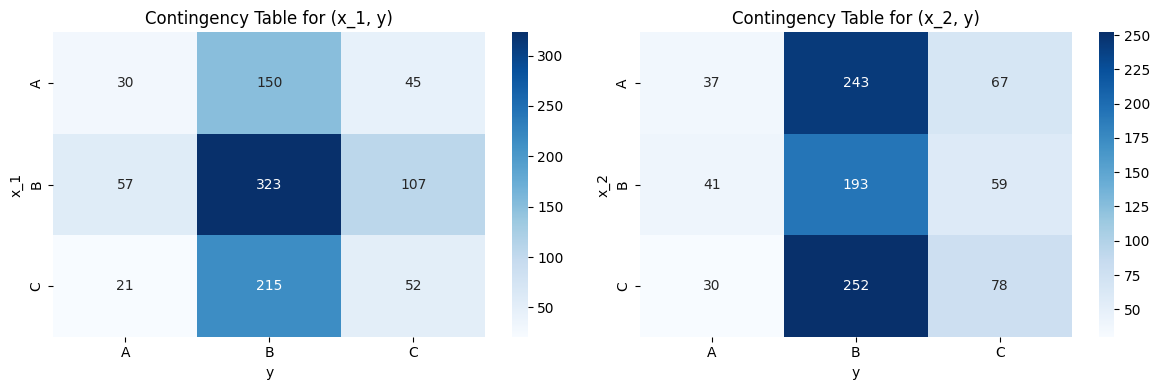

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for reproducibility
np.random.seed(42)

# Generate categorical data
categories = ['A', 'B', 'C']
num_samples = 1000

# Highly correlated x (x_1) with y
x_1 = np.random.choice(categories, size=num_samples, p=[0.2, 0.5, 0.3])
y = np.random.choice(categories, size=num_samples, p=[0.1, 0.7, 0.2])

# Independent x (x_2) with y
x_2 = np.random.choice(categories, size=num_samples, p=[0.35, 0.3, 0.35])

# Create a DataFrame
data = pd.DataFrame({'x_1': x_1, 'x_2': x_2, 'y': y})

# Display the first few rows of the DataFrame
print(data.head())

# Create contingency tables
contingency_x1_y = pd.crosstab(data['x_1'], data['y'])
contingency_x2_y = pd.crosstab(data['x_2'], data['y'])

# Manual calculation of chi-square statistic
def calculate_chi_square(observed):
    row_totals = observed.sum(axis=1)
    col_totals = observed.sum(axis=0)
    total_observed = row_totals.sum()

    expected = np.outer(row_totals, col_totals) / total_observed
    chi_square_statistic = np.sum((observed - expected)**2 / expected)

    return chi_square_statistic.sum()

# Calculate chi-square statistic for (x_1, y)
chi2_x1_y = calculate_chi_square(contingency_x1_y)

# Calculate chi-square statistic for (x_2, y)
chi2_x2_y = calculate_chi_square(contingency_x2_y)

# Display results
print("\nManual Chi-square test for (x_1, y):")
print(f"Chi-square value: {chi2_x1_y}")

print("\nManual Chi-square test for (x_2, y):")
print(f"Chi-square value: {chi2_x2_y}")

# Visualize the data using a heatmap
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(contingency_x1_y, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Contingency Table for (x_1, y)")

sns.heatmap(contingency_x2_y, annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title("Contingency Table for (x_2, y)")

plt.tight_layout()
plt.show()


  x_1 x_2  y
0   B   A  B
1   C   A  B
2   C   C  C
3   B   A  B
4   A   A  C

Manual Chi-square test for (x_1, y):
Chi-square value: y
A    4.988036
B    2.016567
C    1.382986
dtype: float64

Manual Chi-square test for (x_2, y):
Chi-square value: y
A    4.800429
B    0.517037
C    0.495811
dtype: float64


c:\Users\esual\OneDrive\Documents\StaDS\lmu_repo\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\esual\OneDrive\Documents\StaDS\lmu_repo\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


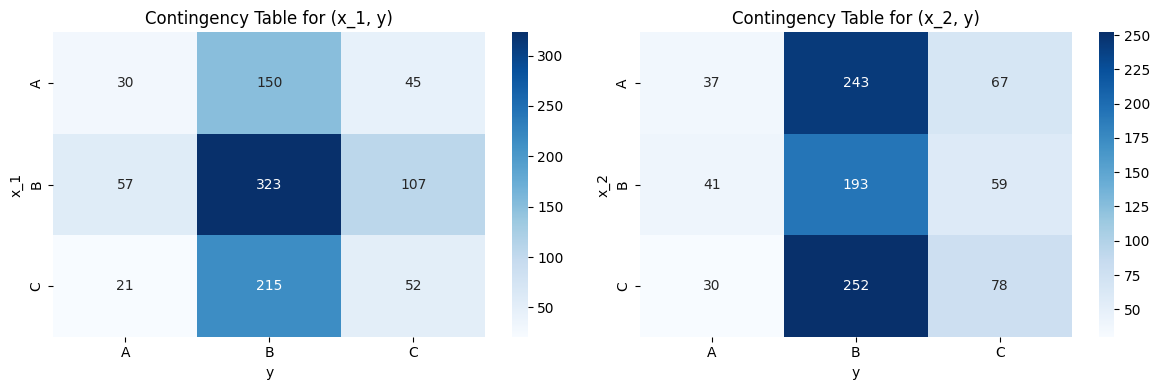

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for reproducibility
np.random.seed(42)

# Generate categorical data
categories = ['A', 'B', 'C']
num_samples = 1000

# Highly correlated x (x_1) with y
x_1 = np.random.choice(categories, size=num_samples, p=[0.2, 0.5, 0.3])
y = np.random.choice(categories, size=num_samples, p=[0.1, 0.7, 0.2])

# Independent x (x_2) with y
x_2 = np.random.choice(categories, size=num_samples, p=[0.35, 0.3, 0.35])

# Create a DataFrame
data = pd.DataFrame({'x_1': x_1, 'x_2': x_2, 'y': y})

# Display the first few rows of the DataFrame
print(data.head())

# Create contingency tables
contingency_x1_y = pd.crosstab(data['x_1'], data['y'])
contingency_x2_y = pd.crosstab(data['x_2'], data['y'])

# Manual calculation of chi-square statistic
def calculate_chi_square(observed):
    row_totals = observed.sum(axis=1)
    col_totals = observed.sum(axis=0)
    total_observed = row_totals.sum()

    expected = np.outer(row_totals, col_totals) / total_observed
    chi_square_statistic = np.sum((observed - expected)**2 / expected)

    return chi_square_statistic  # Convert to float to return a scalar value

# Calculate chi-square statistic for (x_1, y)
chi2_x1_y = calculate_chi_square(contingency_x1_y)

# Calculate chi-square statistic for (x_2, y)
chi2_x2_y = calculate_chi_square(contingency_x2_y)

# Display results
print("\nManual Chi-square test for (x_1, y):")
print(f"Chi-square value: {chi2_x1_y}")

print("\nManual Chi-square test for (x_2, y):")
print(f"Chi-square value: {chi2_x2_y}")

# Visualize the data using a heatmap
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(contingency_x1_y, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Contingency Table for (x_1, y)")

sns.heatmap(contingency_x2_y, annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title("Contingency Table for (x_2, y)")

plt.tight_layout()
plt.show()



Manual Chi-square test for (x_1, y):
Chi-square value: 1581.466

Manual Chi-square test for (x_2, y):
Chi-square value: 1533.4179999999997


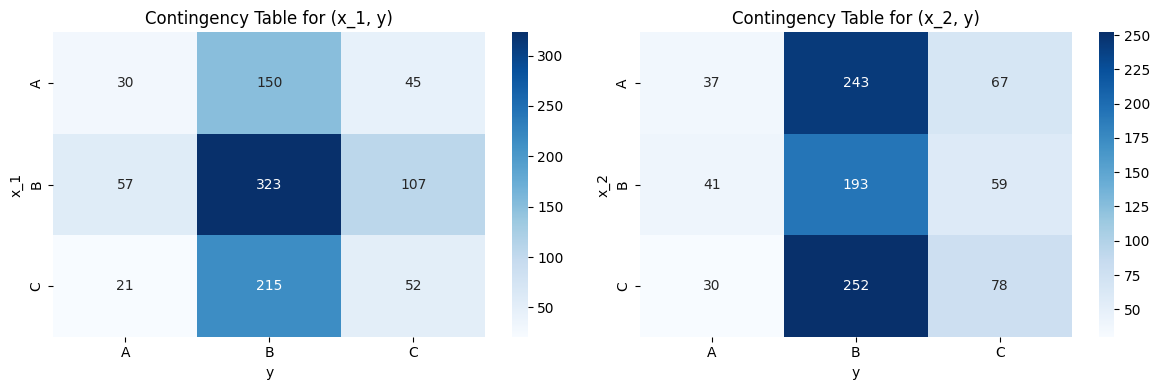

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for reproducibility
np.random.seed(42)

# Generate categorical data
categories = ['A', 'B', 'C']
num_samples = 1000

# Highly correlated x (x_1) with y
x_1 = np.random.choice(categories, size=num_samples, p=[0.2, 0.5, 0.3])
y = np.random.choice(categories, size=num_samples, p=[0.1, 0.7, 0.2])

# Independent x (x_2) with y
x_2 = np.random.choice(categories, size=num_samples, p=[0.35, 0.3, 0.35])

# Create a DataFrame
data = pd.DataFrame({'x_1': x_1, 'x_2': x_2, 'y': y})

# Create contingency tables
contingency_x1_y = pd.crosstab(data['x_1'], data['y'])
contingency_x2_y = pd.crosstab(data['x_2'], data['y'])

# Manual calculation of chi-square statistic
def calculate_chi_square(observed):
    chi_square_statistic = ((observed - observed.sum().mean())**2 / observed.sum().mean()).sum().sum()
    return chi_square_statistic

# Calculate chi-square statistic for (x_1, y)
chi2_x1_y = calculate_chi_square(contingency_x1_y)

# Calculate chi-square statistic for (x_2, y)
chi2_x2_y = calculate_chi_square(contingency_x2_y)

# Display results
print("\nManual Chi-square test for (x_1, y):")
print(f"Chi-square value: {chi2_x1_y}")

print("\nManual Chi-square test for (x_2, y):")
print(f"Chi-square value: {chi2_x2_y}")

# Visualize the data using a heatmap
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(contingency_x1_y, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Contingency Table for (x_1, y)")

sns.heatmap(contingency_x2_y, annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title("Contingency Table for (x_2, y)")

plt.tight_layout()
plt.show()


In [28]:
from scipy.stats import chi2

# Degrees of freedom is the product of the number of categories in x and y minus 1
df_x1_y = (contingency_x1_y.shape[0] - 1) * (contingency_x1_y.shape[1] - 1)
df_x2_y = (contingency_x2_y.shape[0] - 1) * (contingency_x2_y.shape[1] - 1)

# Calculate p-values
p_value_x1_y = 1 - chi2.cdf(chi2_x1_y, df_x1_y)
p_value_x2_y = 1 - chi2.cdf(chi2_x2_y, df_x2_y)

# Display p-values
print("\nP-values:")
print(f"P-value for (x_1, y): {p_value_x1_y}")
print(f"P-value for (x_2, y): {p_value_x2_y}")



P-values:
P-value for (x_1, y): 0.0
P-value for (x_2, y): 0.0


In [36]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Set a random seed for reproducibility
np.random.seed(42)

# Generate categorical data
categories = ['A', 'B', 'C']
num_samples = 1000

# Generate x_1, which is dependent on y
x_1 = np.random.choice(categories, size=num_samples, p=[0.1, 0.7, 0.2])
y = np.random.choice(categories, size=num_samples, p=[0.1, 0.7, 0.2])

# Generate x_2, which is independent of y
x_2 = np.random.choice(categories, size=num_samples, p=[0.35, 0.3, 0.35])

# Create a DataFrame
data = pd.DataFrame({'x_1': x_1, 'x_2': x_2, 'y': y})

# Display the first few rows of the DataFrame
print(data.head())

# Create contingency tables
contingency_x1_y = pd.crosstab(data['x_1'], data['y'])
contingency_x2_y = pd.crosstab(data['x_2'], data['y'])

# Perform chi-square test of independence
chi2_x1_y, p_value_x1_y, _, _ = chi2_contingency(contingency_x1_y)
chi2_x2_y, p_value_x2_y, _, _ = chi2_contingency(contingency_x2_y)

# Display results
print("\nChi-square test for (x_1, y):")
print(f"Chi-square value: {chi2_x1_y}")
print(f"P-value: {p_value_x1_y}")

print("\nChi-square test for (x_2, y):")
print(f"Chi-square value: {chi2_x2_y}")
print(f"P-value: {p_value_x2_y}")


  x_1 x_2  y
0   B   A  B
1   C   A  B
2   B   C  C
3   B   A  B
4   B   A  C

Chi-square test for (x_1, y):
Chi-square value: 2.875764355718369
P-value: 0.5788265147880102

Chi-square test for (x_2, y):
Chi-square value: 5.813277458988371
P-value: 0.21353353518282137


In [37]:
import pandas as pd
from scipy.stats import spearmanr

# Create a sample dataframe
data = {'Feature1': [5, 2, 8, 3, 5],
        'Feature2': [10, 5, 3, 8, 5]}

df = pd.DataFrame(data)

# Function to transform features into ranks and compute Spearman correlation
def spearman_correlation(dataframe):
    ranks = dataframe.rank(axis=0, method='average')  # Assign ranks
    correlation, p_value = spearmanr(ranks)  # Compute Spearman correlation
    return correlation, p_value

# Compute Spearman correlation for the sample dataframe
corr, p_val = spearman_correlation(df)

print("Spearman Correlation Matrix:")
print(corr)
print("\nP-values:")
print(p_val)


Spearman Correlation Matrix:
-0.34210526315789475

P-values:
0.573070286629975


In [40]:
df.rank(axis=0, method='average')

,Feature1,Feature2
0,3.5,5.0
1,1.0,2.5
2,5.0,1.0
3,2.0,4.0
4,3.5,2.5


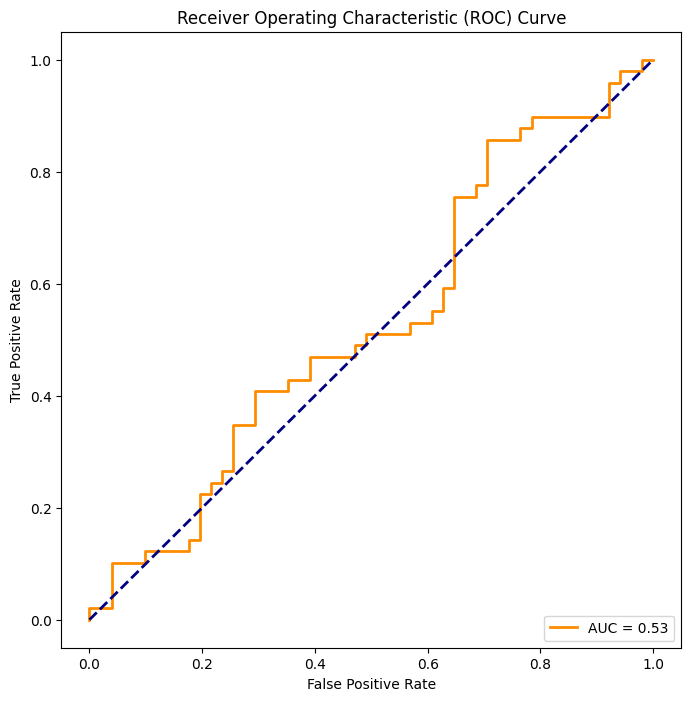

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate sample data
np.random.seed(42)
X = np.random.rand(100)  # Example feature values between 0 and 1
y = np.random.randint(2, size=100)  # Binary target variable (0 or 1)

# Step 2: Sort Feature Values
X_sorted = np.sort(X)

# Step 3-6: Vary Thresholds, Predict Classes, Calculate TPR and FPR, Generate (FPR, TPR) Pairs
fpr, tpr, thresholds = roc_curve(y, X_sorted)

# Step 7: Calculate AUC
auc_score = auc(fpr, tpr)

# Step 8: Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


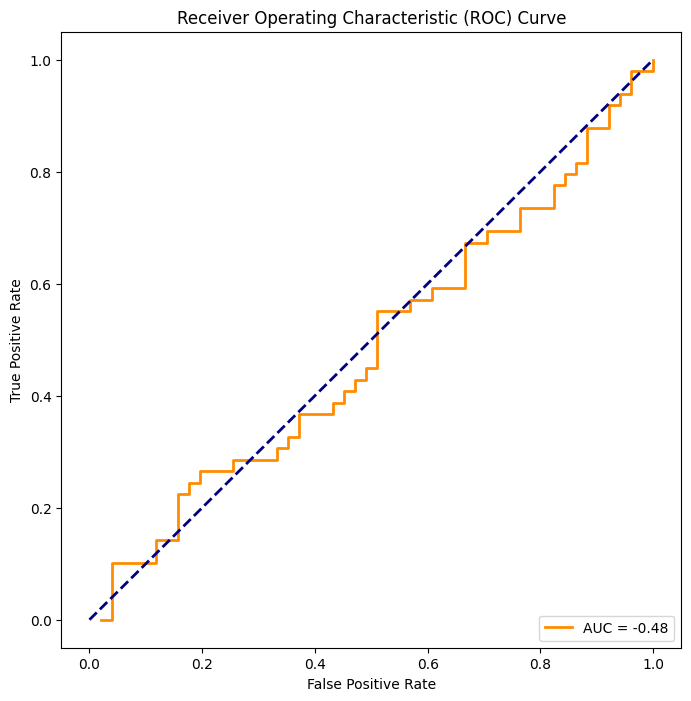

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
X = np.random.rand(100)  # Example feature values between 0 and 1
y = np.random.randint(2, size=100)  # Binary target variable (0 or 1)

# Combine feature values and labels for sorting
data = np.column_stack((X, y))

# Step 2: Sort Feature Values
data_sorted = data[data[:, 0].argsort()]

# Initialize variables for ROC curve
total_positives = np.sum(y)
total_negatives = len(y) - total_positives
true_positive_rates = []
false_positive_rates = []

# Step 3-6: Vary Thresholds, Predict Classes, Calculate TPR and FPR, Generate (FPR, TPR) Pairs
for threshold in data_sorted[:, 0]:
    predictions = (data_sorted[:, 0] >= threshold).astype(int)
    true_positives = np.sum(predictions * data_sorted[:, 1])
    false_positives = np.sum(predictions * (1 - data_sorted[:, 1]))

    true_positive_rate = true_positives / total_positives
    false_positive_rate = false_positives / total_negatives

    true_positive_rates.append(true_positive_rate)
    false_positive_rates.append(false_positive_rate)

# Step 7: Calculate AUC
auc_score = np.trapz(true_positive_rates, false_positive_rates)

# Step 8: Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(false_positive_rates, true_positive_rates, color='darkorange', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [46]:
thresholds

array([       inf, 0.98688694, 0.96958463, 0.93949894, 0.89482735,
       0.88721274, 0.82873751, 0.81546143, 0.80839735, 0.77224477,
       0.77127035, 0.77096718, 0.76078505, 0.73199394, 0.72960618,
       0.70685734, 0.66252228, 0.61185289, 0.59865848, 0.59789998,
       0.5612772 , 0.54269608, 0.51423444, 0.49517691, 0.4937956 ,
       0.47221493, 0.42754102, 0.38867729, 0.36636184, 0.35846573,
       0.35675333, 0.32533033, 0.32518332, 0.27134903, 0.21233911,
       0.19967378, 0.19871568, 0.18182497, 0.15599452, 0.14092422,
       0.13949386, 0.12203823, 0.07404465, 0.05808361, 0.04645041,
       0.04522729, 0.02541913, 0.02058449, 0.00552212])

In [50]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Load Spambase dataset
spambase = fetch_openml(name='spambase', version=1, as_frame=True)
X = spambase.data
y = (spambase.target == '1').astype(int)  # Convert '1' to 1, '0' remains 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple classifier (Random Forest in this example)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Calculate AUC-ROC scores for each feature
auc_scores = []
for feature in X.columns:
    # Use predicted probabilities for positive class
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    
    # Calculate AUC-ROC score for the current feature
    auc_score = roc_auc_score(y_test, X_test[feature])
    auc_scores.append((feature, auc_score))

# Sort features based on AUC-ROC scores in descending order
sorted_features = sorted(auc_scores, key=lambda x: x[1], reverse=True)

# Display the sorted features and their AUC-ROC scores
for feature, auc_score in sorted_features:
    print(f"Feature: {feature}, AUC-ROC Score: {auc_score:.4f}")


c:\Users\esual\OneDrive\Documents\StaDS\lmu_repo\.venv\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Feature: char_freq_%21, AUC-ROC Score: 0.8383
Feature: capital_run_length_longest, AUC-ROC Score: 0.7903
Feature: capital_run_length_average, AUC-ROC Score: 0.7903
Feature: word_freq_your, AUC-ROC Score: 0.7757
Feature: char_freq_%24, AUC-ROC Score: 0.7543
Feature: capital_run_length_total, AUC-ROC Score: 0.7377
Feature: word_freq_free, AUC-ROC Score: 0.7215
Feature: word_freq_you, AUC-ROC Score: 0.7059
Feature: word_freq_our, AUC-ROC Score: 0.7030
Feature: word_freq_remove, AUC-ROC Score: 0.6902
Feature: word_freq_money, AUC-ROC Score: 0.6766
Feature: word_freq_all, AUC-ROC Score: 0.6622
Feature: word_freq_mail, AUC-ROC Score: 0.6465
Feature: word_freq_000, AUC-ROC Score: 0.6388
Feature: word_freq_email, AUC-ROC Score: 0.6316
Feature: word_freq_business, AUC-ROC Score: 0.6269
Feature: word_freq_receive, AUC-ROC Score: 0.6250
Feature: word_freq_over, AUC-ROC Score: 0.6243
Feature: word_freq_internet, AUC-ROC Score: 0.6211
Feature: word_freq_order, AUC-ROC Score: 0.6137
Feature: word_fr

In [53]:
sorted_features

[('char_freq_%21', 0.8383142595007003),
 ('capital_run_length_longest', 0.7903109759041963),
 ('capital_run_length_average', 0.7902675165387029),
 ('word_freq_your', 0.7757400164179825),
 ('char_freq_%24', 0.7543386933217442),
 ('capital_run_length_total', 0.7377492877492878),
 ('word_freq_free', 0.7215486020570766),
 ('word_freq_you', 0.7059370322082187),
 ('word_freq_our', 0.7030083538558115),
 ('word_freq_remove', 0.6902264715824038),
 ('word_freq_money', 0.6765681587715486),
 ('word_freq_all', 0.6621927664300546),
 ('word_freq_mail', 0.6464556473031049),
 ('word_freq_000', 0.6387657540199914),
 ('word_freq_email', 0.6316215172147376),
 ('word_freq_business', 0.6269206625138828),
 ('word_freq_receive', 0.6250181080689555),
 ('word_freq_over', 0.6243034429475108),
 ('word_freq_internet', 0.6211405669032788),
 ('word_freq_order', 0.613721087449901),
 ('word_freq_address', 0.6079747935680139),
 ('word_freq_credit', 0.5979549954126225),
 ('word_freq_make', 0.5958834323241103),
 ('char_f

In [56]:
feature_to_find = "word_freq_parts"  # or "charExclamation"

# Using list comprehension to find the AUC-ROC score for the specified feature
auc_score = [score for feature, score in sorted_features if feature == feature_to_find]

if auc_score:
    print(f"The AUC-ROC score for {feature_to_find} is: {auc_score[0]}")
else:
    print(f"Feature {feature_to_find} not found in the list.")

The AUC-ROC score for word_freq_parts is: 0.4963469988893717


In [63]:
import math
import numpy as np


def discretize_feature(feature, bins):
    return np.digitize(feature, bins, right=True)

def calculate_mutual_information(feature, target):
    # Discretize the feature into bins
    bins = [0.5, 1.0, 1.5, 2.0, 2.5]
    discretized_feature = discretize_feature(feature, bins)
    # Create a dictionary to store counts for each combination of feature and target
    joint_counts = {}
    feature_counts = {}
    target_counts = {}

    # Calculate joint counts
    for f, t in zip(discretized_feature, target):
        if (f, t) in joint_counts:
            joint_counts[(f, t)] += 1
        else:
            joint_counts[(f, t)] = 1

        # Calculate feature counts
        if f in feature_counts:
            feature_counts[f] += 1
        else:
            feature_counts[f] = 1

        # Calculate target counts
        if t in target_counts:
            target_counts[t] += 1
        else:
            target_counts[t] = 1

    # Calculate probabilities
    total_samples = len(feature)
    mutual_information = 0.0

    for (f, t), count in joint_counts.items():
        p_joint = count / total_samples
        p_feature = feature_counts[f] / total_samples
        p_target = target_counts[t] / total_samples

        # Avoid log(0) by checking for non-zero probabilities
        if p_feature > 0 and p_target > 0:
            mutual_information += p_joint * math.log2(p_joint / (p_feature * p_target))

    return mutual_information

# Example usage
feature = [1.2, 1.5, 1.8, 2.0, 0.8, 1.0, 1.2, 1.4, 1.5, 1.9, 2.1, 2.5]
target = ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C']

mi_score = calculate_mutual_information(feature, target)
print("Mutual Information Score:", mi_score)


Mutual Information Score: 0.7212518360044661


In [59]:
bins = [0.5, 1.0, 1.5, 2.0, 2.5]
discretized_feature = discretize_feature(feature, bins)

In [60]:
discretized_feature

array([2, 2, 3, 3, 1, 1, 2, 2, 2, 3, 4, 4], dtype=int64)

# Exercise sheet

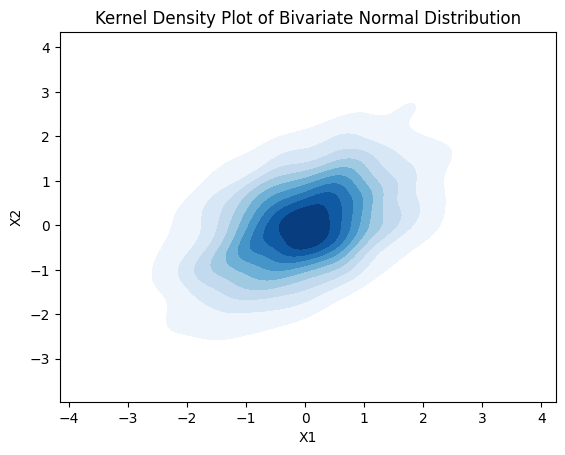

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set mean and covariance matrix for the bivariate normal distribution
mean = [0, 0]
covariance_matrix = [[1, 0.5], [0.5, 1]]

# Generate samples from the bivariate normal distribution
np.random.seed(42)
samples = np.random.multivariate_normal(mean, covariance_matrix, 1000)

# Create a kernel density plot
sns.kdeplot(x=samples[:, 0], y=samples[:, 1], cmap="Blues", fill=True)

# Set plot labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Kernel Density Plot of Bivariate Normal Distribution')

# Show the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


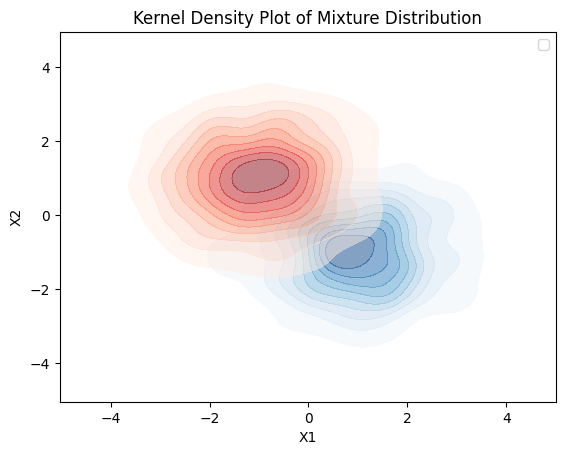

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define mean vectors and covariance matrix
mean_vector_Y1 = np.array([1, -1])
mean_vector_Y2 = np.array([-1, 1])
covariance_matrix = np.identity(2)

# Generate samples from the bivariate normal distributions
samples_Y1 = multivariate_normal.rvs(mean=mean_vector_Y1, cov=covariance_matrix, size=500)
samples_Y2 = multivariate_normal.rvs(mean=mean_vector_Y2, cov=covariance_matrix, size=500)

# Calculate the density values for the mixture distribution
density_values = 0.5 * (multivariate_normal.pdf(samples_Y1, mean_vector_Y1, covariance_matrix) +
                        multivariate_normal.pdf(samples_Y2, mean_vector_Y2, covariance_matrix))

# Create a kernel density plot
sns.kdeplot(x=samples_Y1[:, 0], y=samples_Y1[:, 1], cmap="Blues", fill=True, alpha=0.5, label='Y=1')
sns.kdeplot(x=samples_Y2[:, 0], y=samples_Y2[:, 1], cmap="Reds", fill=True, alpha=0.5, label='Y=0')

# Set plot labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Kernel Density Plot of Mixture Distribution')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [27]:
import pandas as pd

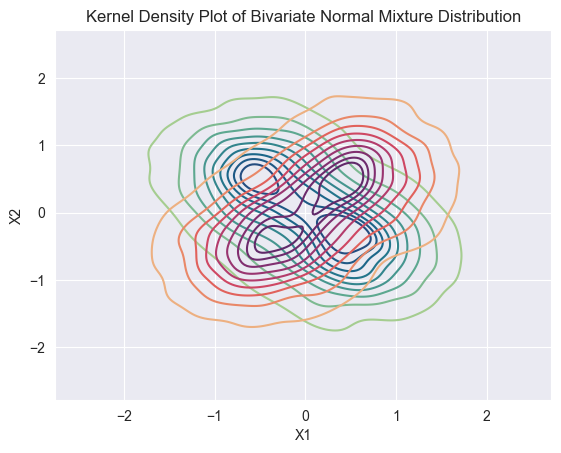

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

sns.set_style('darkgrid')

### Y = 1
# Define mean vectors and covariance matrix
mean_vector_Y1 = np.array([1, -1])
mean_vector_Y2 = np.array([-1, 1])
covariance_matrix = np.identity(2)

# Generate samples from the mixture of bivariate normal distributions
samples_Y1 = multivariate_normal.rvs(mean=mean_vector_Y1, cov=covariance_matrix, size=1000)
samples_Y2 = multivariate_normal.rvs(mean=mean_vector_Y2, cov=covariance_matrix, size=1000)
#all_samples = 0.5*(samples_Y1 + samples_Y2)

# Concatenate the samples
all_samples_y1 = np.concatenate([0.5*samples_Y1, 0.5*samples_Y2])

# Create a kernel density plot for the mixture
sns.kdeplot(x=all_samples_y1[:, 0], y=all_samples_y1[:, 1], cmap="crest", fill=False, label='Y=1')


### Y = 0
# Define mean vectors and covariance matrix
mean_vector_Y1 = np.array([1, 1])
mean_vector_Y2 = np.array([-1, -1])
covariance_matrix = np.identity(2)

# Generate samples from the mixture of bivariate normal distributions
samples_Y1 = multivariate_normal.rvs(mean=mean_vector_Y1, cov=covariance_matrix, size=1000)
samples_Y2 = multivariate_normal.rvs(mean=mean_vector_Y2, cov=covariance_matrix, size=1000)
#all_samples = 0.5*(samples_Y1 + samples_Y2)

# Concatenate the samples
all_samples_y0 = np.concatenate([0.5*samples_Y1, 0.5*samples_Y2])

# Create a kernel density plot for the mixture
sns.kdeplot(x=all_samples_y0[:, 0], y=all_samples_y0[:, 1], cmap="flare", fill=False, label='Y=0', legend=True)

# Set plot labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Kernel Density Plot of Bivariate Normal Mixture Distribution')


# Show the plot
plt.show()


In [29]:
X = pd.concat(pd.DataFrame(all_samples_y1, columns=['x1', 'x2']), pd.DataFrame(all_samples_y0, columns=['x1', 'x2']))
Y = np.concatenate([np.ones(1000), np.zeros(1000)])
X['Y'] = Y

,x1,x2
0,0.577856,-0.306823
1,0.702006,-0.892254
2,0.588511,-0.179265
3,-0.778323,-0.716256
4,-0.855187,-1.883525
...,...,...
1995,-0.956087,0.498718
1996,-0.677559,1.433340
1997,-0.445751,0.669655
1998,-0.267515,0.254525


c:\Users\esual\OneDrive\Documents\StaDS\lmu_repo\.venv\Lib\site-packages\seaborn\distributions.py:1128: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


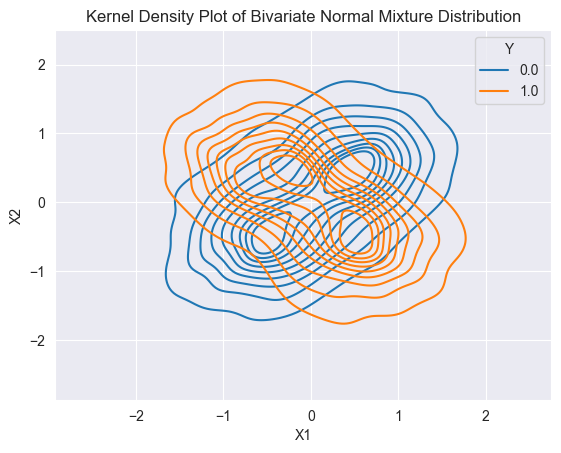

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

sns.set_style('darkgrid')

### Y = 1
# Define mean vectors and covariance matrix
mean_vector_Y1 = np.array([1, -1])
mean_vector_Y2 = np.array([-1, 1])
covariance_matrix = np.identity(2)

# Generate samples from the mixture of bivariate normal distributions
samples_Y1 = multivariate_normal.rvs(mean=mean_vector_Y1, cov=covariance_matrix, size=1000)
samples_Y2 = multivariate_normal.rvs(mean=mean_vector_Y2, cov=covariance_matrix, size=1000)
#all_samples = 0.5*(samples_Y1 + samples_Y2)

# Concatenate the samples
all_samples_y1 = np.concatenate([0.5*samples_Y1, 0.5*samples_Y2])


### Y = 0
# Define mean vectors and covariance matrix
mean_vector_Y1 = np.array([1, 1])
mean_vector_Y2 = np.array([-1, -1])
covariance_matrix = np.identity(2)

# Generate samples from the mixture of bivariate normal distributions
samples_Y1 = multivariate_normal.rvs(mean=mean_vector_Y1, cov=covariance_matrix, size=1000)
samples_Y2 = multivariate_normal.rvs(mean=mean_vector_Y2, cov=covariance_matrix, size=1000)
#all_samples = 0.5*(samples_Y1 + samples_Y2)

# Concatenate the samples
all_samples_y0 = np.concatenate([0.5*samples_Y1, 0.5*samples_Y2])

# Create a kernel density plot for the mixture
X = pd.concat([pd.DataFrame(all_samples_y1, columns=['x1', 'x2']), pd.DataFrame(all_samples_y0, columns=['x1', 'x2'])])
Y = np.concatenate([np.ones(2000), np.zeros(2000)])
X['Y'] = Y

sns.kdeplot(data=X, x='x1', y='x2', cmap="flare", fill=False, label='Y=0', legend=True, hue='Y')


# Set plot labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Kernel Density Plot of Bivariate Normal Mixture Distribution')


# Show the plot
plt.show()


In [52]:
sns.kdeplot(data=x)

5000

In [43]:
pd.concat([pd.DataFrame(all_samples_y1, columns=['x1', 'x2']), pd.DataFrame(all_samples_y0, columns=['x1', 'x2'])])

,x1,x2
0,1.613393,-1.073088
1,0.850655,-0.095977
2,0.891503,0.709511
3,0.575368,-0.471667
4,0.853684,0.906739
...,...,...
1995,-0.832726,-1.259955
1996,-1.682590,-0.941091
1997,-0.504621,-2.071036
1998,-0.730140,-1.103027


In [45]:
len(all_samples_y1)

2000